<a href="https://colab.research.google.com/github/Ritam333/CNN_EXAMPLE/blob/main/CNNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:

x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
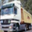

In [ ]:
x_train[1]

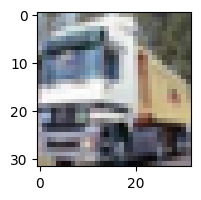

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1])

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_flat=x_train.reshape(len(x_train),32*32*3)
x_test_flat=x_test.reshape(len(x_test),32*32*3)
y_train=y_train.flatten()
y_test_flat=y_test.flatten()

In [ ]:
#ANN
model=keras.Sequential([

    keras.layers.Dense(2000,input_shape=(3072,),activation='sigmoid'),
    keras.layers.Dense(1000,input_shape=(3072,),activation='sigmoid'),
    keras.layers.Dense(10,input_shape=(3072,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 102ms/step - accuracy: 0.2435 - loss: 2.0932
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 102ms/step - accuracy: 0.3357 - loss: 1.8169


In [ ]:
#CNN

cnn=keras.Sequential([
   layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.Dense(3000, input_shape=(3072,), activation='relu'),
    layers.Dense(1000, input_shape=(3072,), activation='relu'),
    layers.Dense(10, input_shape=(3072,), activation='sigmoid')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.3314 - loss: 1.7856


1563/1563 [==============================] - 77s 49ms/step - loss: 2.1228 - accuracy: 0.2200


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5111 - loss: 1.3638


[1.3656415939331055, 0.5091000199317932]

In [ ]:
y_predicted=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [ ]:
y_predicted_label=list(np.argmax(i) for i in y_predicted)




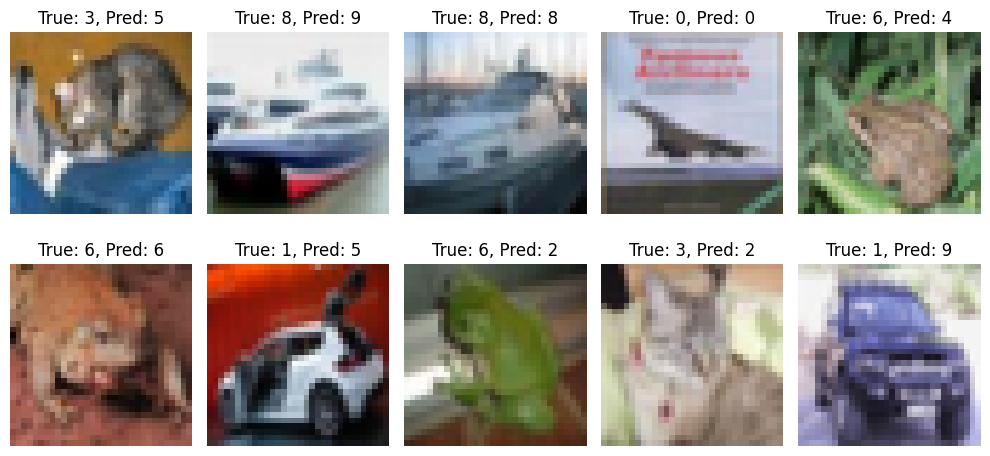

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f"True: {y_test[i][0]}, Pred: {y_predicted_label[i]}")

plt.tight_layout()
plt.show()

In [ ]:
# Correct Predictions:

# In some cases, the predicted label matches the true label. For example:
# Image 3 (True: 8, Pred: 8) and Image 4 (True: 0, Pred: 0) show that the model correctly classified the images.
# This indicates the model has learned the patterns for these classes.

# Incorrect Predictions:

# Many images are misclassified. For example:
# Image 1 (True: 3, Pred: 5) and Image 6 (True: 6, Pred: 2).
# These suggest areas where the model struggles, either because the images are ambiguous, the data is noisy, or the model hasn't learned enough.
